# Machine Learning: Lidando com dados de muitas dimensões
---

Esse projeto tem a proposta de desenvolver a Alura_care, uma startup fictícia que tem por objetivo reduzir o número de exames necessários para o diagnóstico de um tipo específico de câncer. Para isso, iniciaremos um pré-processamento dos dados, aprendendo a identificar, por exemplo, células vazias, e como lidar com esse tipo de problema. Também identificaremos valores constantes nos dados e como eles podem impactar ou não no processo de classificação, além de como a correlação influe neste mesmo processo.

Feito isso, iniciaremos os métodos de seleção de features automáticos, como o SelectKBest e o RFE. Além disso, conseguiremos determinar qual o conjunto que nos gerará o melhor resultado possível no processo de classificação, quantas features precisaremos e quais são essas features.

Por último, aprenderemos como visualizar em um plano um dado de alta dimensionalidade, reduzindo a dimensão mas mantendo o maior número possível de informações.

---

In [1]:
import pandas as pd
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler # para padronizar dados


In [2]:
resultado_exames = pd.read_csv('data/exames.csv')

In [3]:
resultado_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
valores_exames = resultado_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultado_exames.diagnostico

In [5]:
resultado_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [6]:
valores_exames_v1 = valores_exames.drop(columns='exame_33')

In [7]:
SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

In [8]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultado da CLassificação 92.40%


In [9]:
# Classificador que chuta um único valor para vrificar quanto ele acerta.
classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da CLassificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da CLassificação boba 66.67%


In [10]:
# Fazendo a padronização dos dados para melhorar a visualização dos plots
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 # a saída é um numpy, mas estamos trabalhando com um dataframe

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [11]:
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())

In [12]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515
1,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392
2,M,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685
3,M,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383
4,M,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589
565,M,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664
566,M,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117
567,M,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194


In [13]:
dados_plot = pd.melt(dados_plot, id_vars = "diagnostico", var_name = "exames", value_name = "valores")
dados_plot

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297
...,...,...,...
5685,M,exame_10,-0.312589
5686,M,exame_10,-0.217664
5687,M,exame_10,-0.809117
5688,M,exame_10,2.137194


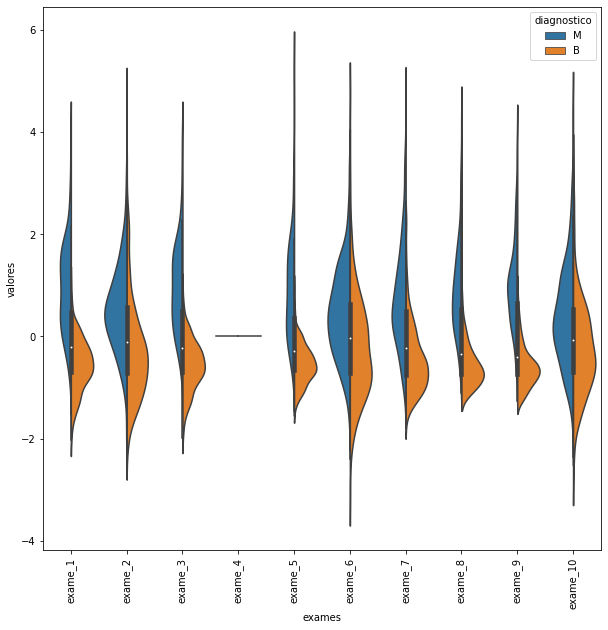

In [14]:
plt.figure(figsize=(10,10))

sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split=True)
plt.xticks(rotation = 90)
plt.show()

- Se a crista da onda azul está distante da crista da onda laranja, é um bom indicador de que o exame em questão serve para diferenciar se o diagnóstico é Maligno ou Benigno.
- O exame_4, no exemplo acima, não muda. Seus valores são constantes.
    - Eliminar a variável que é constante, pois ela não agrega em nada (exemplo: porcos e cachorros tem 4 patas (1), entao nao consigo identificar apenas com essa informação)

In [15]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = "diagnostico", var_name = "exames", value_name = "valores")

    plt.figure(figsize=(10,10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split=True)
    plt.xticks(rotation = 90)
    plt.show()

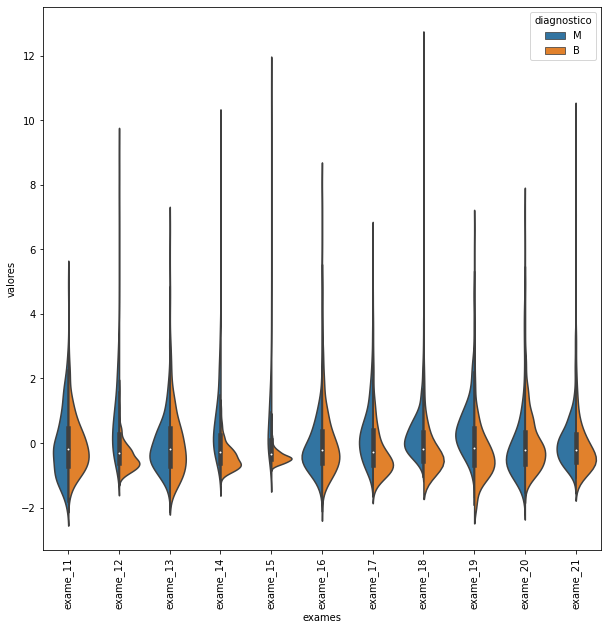

In [16]:
grafico_violino(valores_exames_v2, 10, 21)

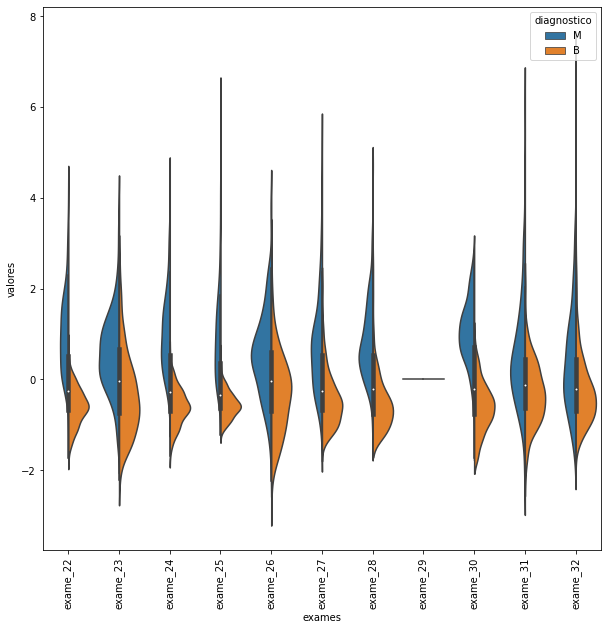

In [17]:
grafico_violino(valores_exames_v2, 21, 32)

In [18]:
# removendo as colunas com valores constantes
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29']) # reduzimos 2 dimensões até aqui.

In [19]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

In [20]:
classificar(valores_exames_v3)

Resultado da CLassificação 92.98%


<AxesSubplot:>

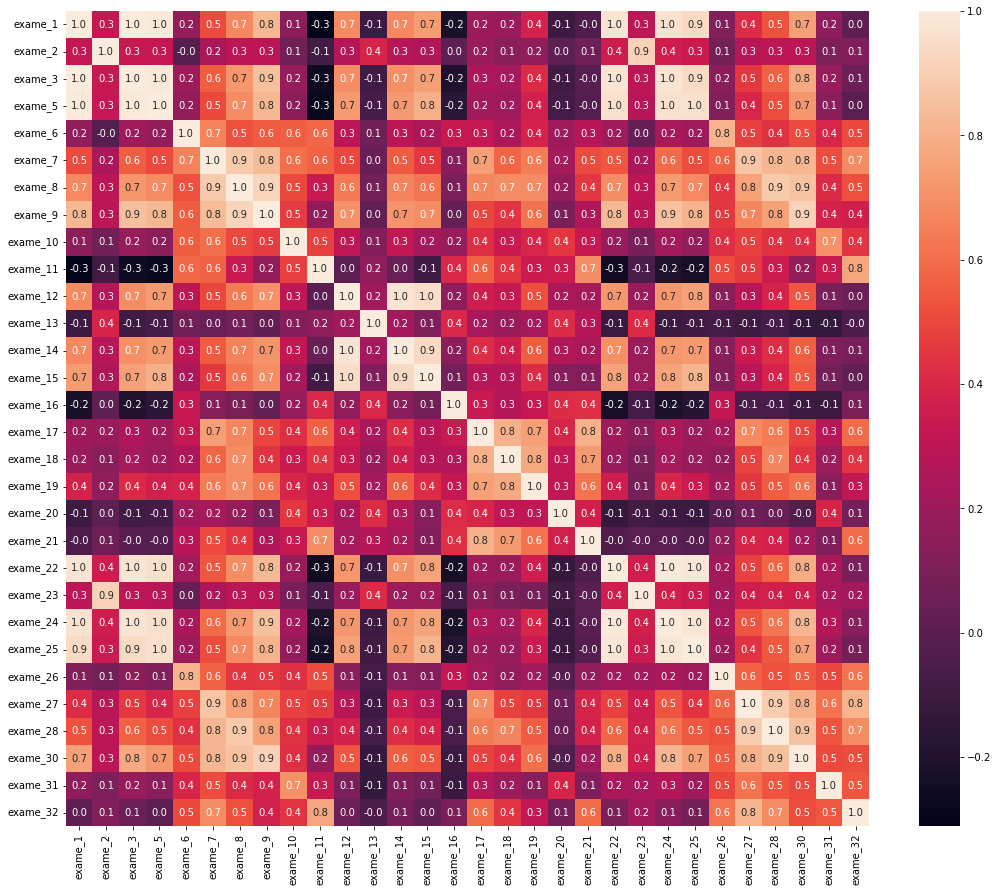

In [21]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(18,15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f") # mostrar valores com apenas 1 casa decimal

In [22]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [23]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas # variáveis com alta correlação podem ser excluídas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [24]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [25]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [26]:
classificar(valores_exames_v4) # o modelo pioroou pois excluímos todas as colunas altamente correlacionadas, mas na verdade devemos escolher apenas uma de cada par correlacionado para excluir

Resultado da CLassificação 91.81%


In [27]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])

In [28]:
classificar(valores_exames_v5) # o resultado se manteve. Excluímos mais duas features sem prejudicar o resultado.

Resultado da CLassificação 92.98%


Selecionar as K melhores features

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
selecionar_kmelhores = SelectKBest(chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7fd65fdada60>)

In [31]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"])) # para pegar os valores antes de normalizar, pois os chi² não aceita valores negativos

In [32]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)


selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [33]:
teste_kbest.shape

(171, 5)

In [34]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

# reduzimos os dados em 85% e a acurácia não mudou tanto. 

Resultado da CLassificação 92.40%


Matriz de Confusão

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

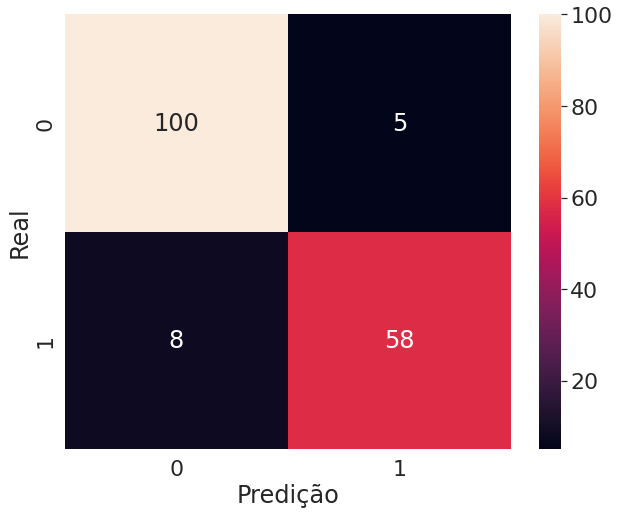

In [37]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

O eixo Y está representando nossos valores reais, e o eixo X representa os valores de predição. Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno. A soma dos dois quadrados superiores nos trará o total de cânceres diagnosticados como benignos, e a dos dois quadrados inferiores o total de cânceres diagnosticados como malignos.

De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos. Mas por que essas informações são importantes?

Em alguns casos, como na área da saúde, é muito importante sabermos qual classificação estamos acertando mais. Imagine, por exemplo, uma pessoa que realmente tem câncer, mas recebe o diagnóstico de que não tem. Esse tipo de equívoco no diagnóstico tornaria o tratamento mais difícil, afinal o tempo de realização impacta nas chances de cura desse tipo de doença.

### Utilizando o RFE - Recursive Feature Elimination

Resultado da CLassificação 87.13%


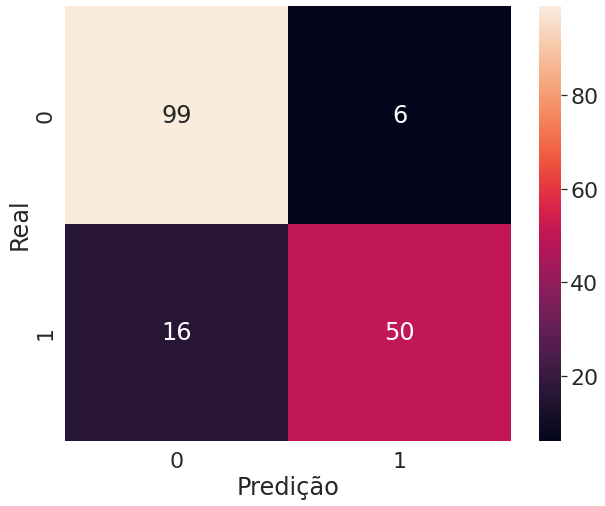

In [53]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))

### Utilizando o RFECV - Cross Validation

Resultado da CLassificação 92.98%


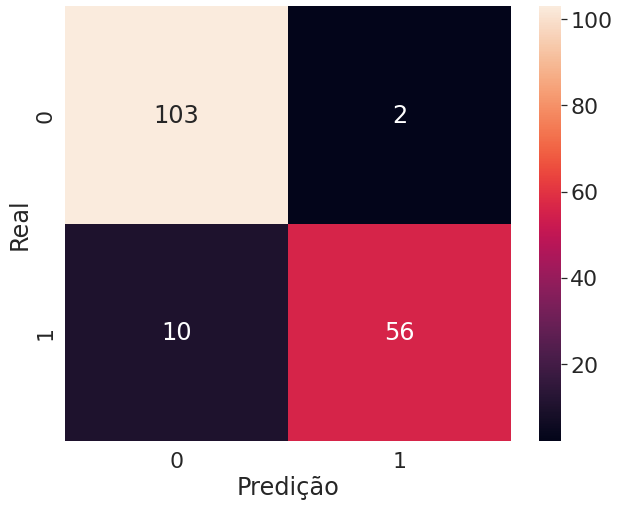

In [42]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_rfecv, teste_y)*100))

In [40]:
selecionador_rfecv.n_features_ # devolve quantas features foram selecionadas

26

In [43]:
selecionador_rfecv.support_ # devolve um array contendo booleanos das features selecionadas

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [45]:
treino_x.columns[selecionador_rfecv.support_] # mostra os nomes das features selecionadas

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [46]:
selecionador_rfecv.grid_scores_ # array com scores para todas as features

/home/laryssastephanie/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

Usando a documentação vi que agora é utilizado o comando selecionadorrfecv.cvresults, que retorna um dicionário com as médias e todos os testes individualmente. Mais precisamente o código fica dessa forma utilizando apenas as médias dentro do dicionário:


<function matplotlib.pyplot.show(close=None, block=None)>

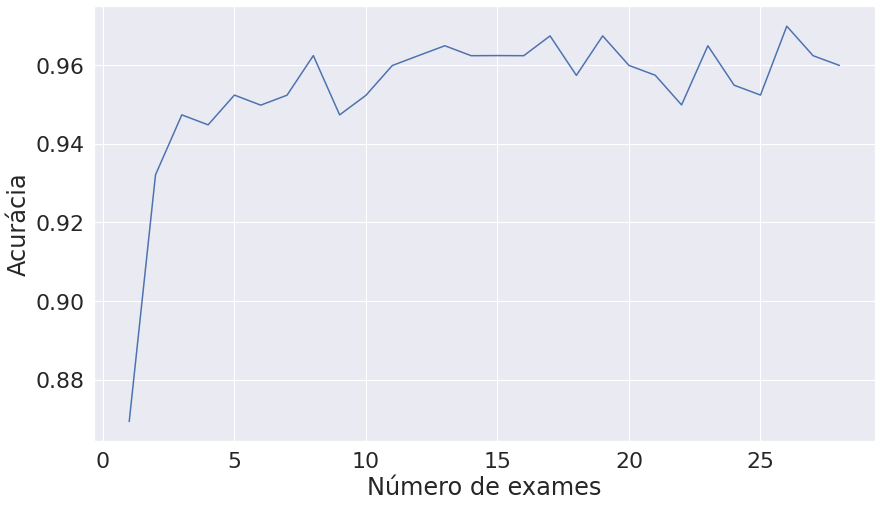

In [51]:
plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

In [54]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6) # selecionamos 2 features apenas
valores_exames_v7.shape

(569, 2)

<AxesSubplot:>

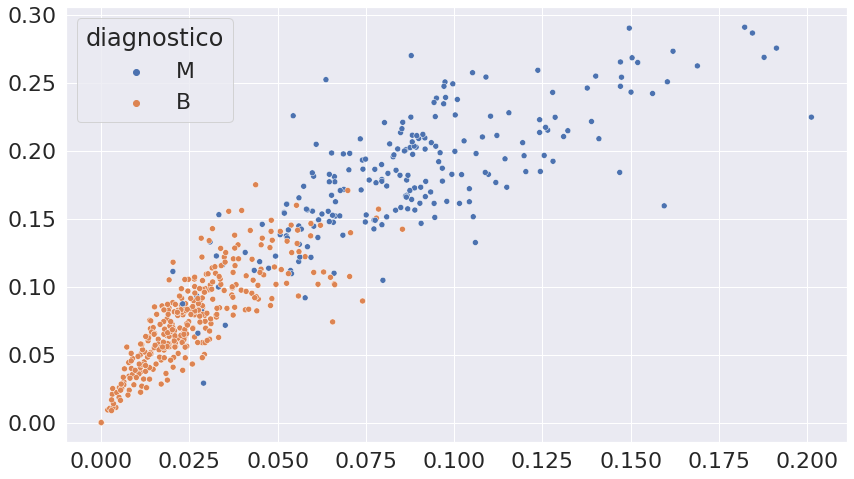

In [55]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

Utilizando o PCA para manter o maior número possível de informação

In [56]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5) # v5 possui dados padronizados
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148886],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot:>

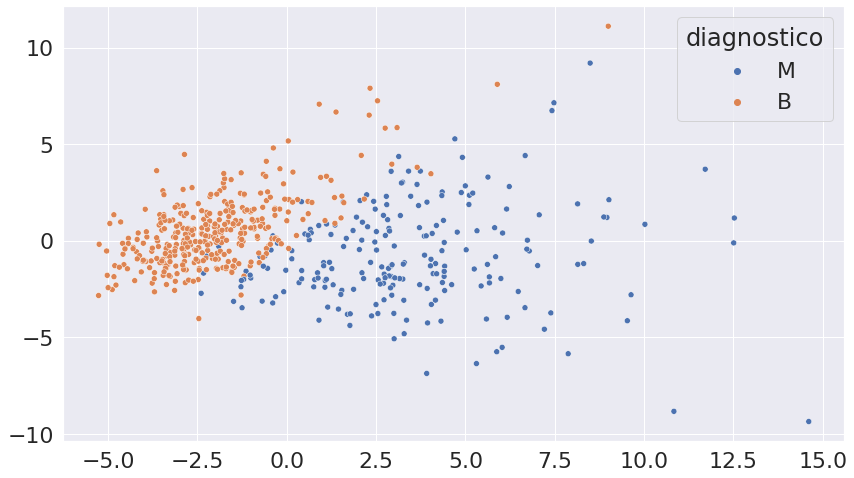

In [61]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

Com TSNE

In [63]:
from sklearn.manifold import TSNE

/home/laryssastephanie/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/laryssastephanie/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

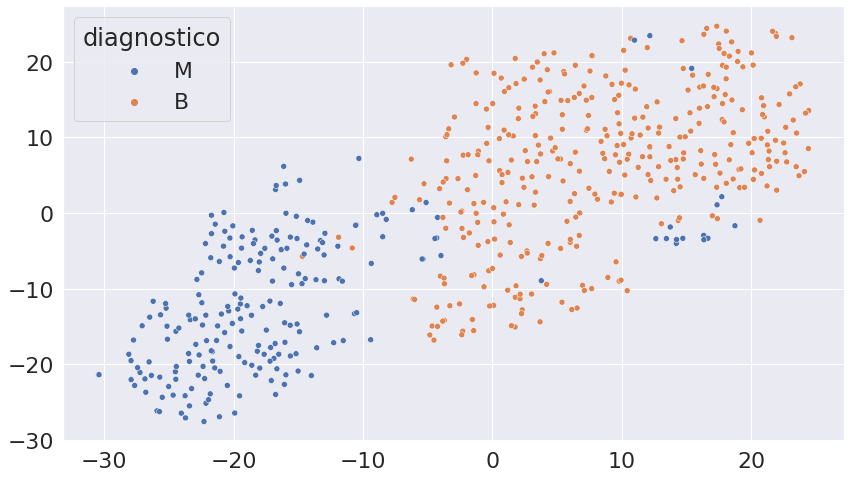

In [65]:
tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5) # v5 possui dados padronizados
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)

Com a nossa última visualização, conseguimos estabelecer uma fronteira entre diagnósticos de cânceres benignos e malignos. Sendo assim, podemos solicitar que os pacientes que se encontram nessa fronteira realizem mais exames para aumentarmos a precisão do diagnóstico.